### TEXT CLASSIFICATION USING NAIVE BUYES AND SENTIMENT ANALYSIS ON BLOG POSTS 

 #### Overview :

In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

In [2]:
%pip install textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.4 MB/s eta 0:00:00


In [5]:
import pandas as pd
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tejanayak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tejanayak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
df = pd.read_csv('blogs.csv')

In [15]:
df

,Data,Labels,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion120945 ...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc837...
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc836...


In [12]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tejanayak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [14]:
df['cleaned_text'] = df['Data'].apply(lambda x: ' '.join([word for word in word_tokenize(x.lower().translate(str.maketrans('', '', string.punctuation))) if word not in stopwords.words('english')]))

In [16]:
# Feature extraction
X = TfidfVectorizer().fit_transform(df['cleaned_text'])
y = df['Labels']


In [17]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

# Model training and evaluation
for model, name in [(MultinomialNB(), 'MultinomialNB'), (BernoulliNB(), 'BernoulliNB')]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} - Accuracy: {accuracy_score(y_test, y_pred)}, Precision: {precision_score(y_test, y_pred, average="weighted")}, Recall: {recall_score(y_test, y_pred, average="weighted")}, F1 Score: {f1_score(y_test, y_pred, average="weighted")}')


MultinomialNB - Accuracy: 0.82, Precision: 0.844747244324381, Recall: 0.82, F1 Score: 0.8144501134827706
BernoulliNB - Accuracy: 0.315, Precision: 0.5752334147334147, Recall: 0.315, F1 Score: 0.3028590738276405


In [19]:
# Sentiment analysis
df['sentiment'] = df['Data'].apply(lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0 else 'negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral')
print(df['sentiment'].value_counts())


sentiment
positive    1543
negative     457
Name: count, dtype: int64


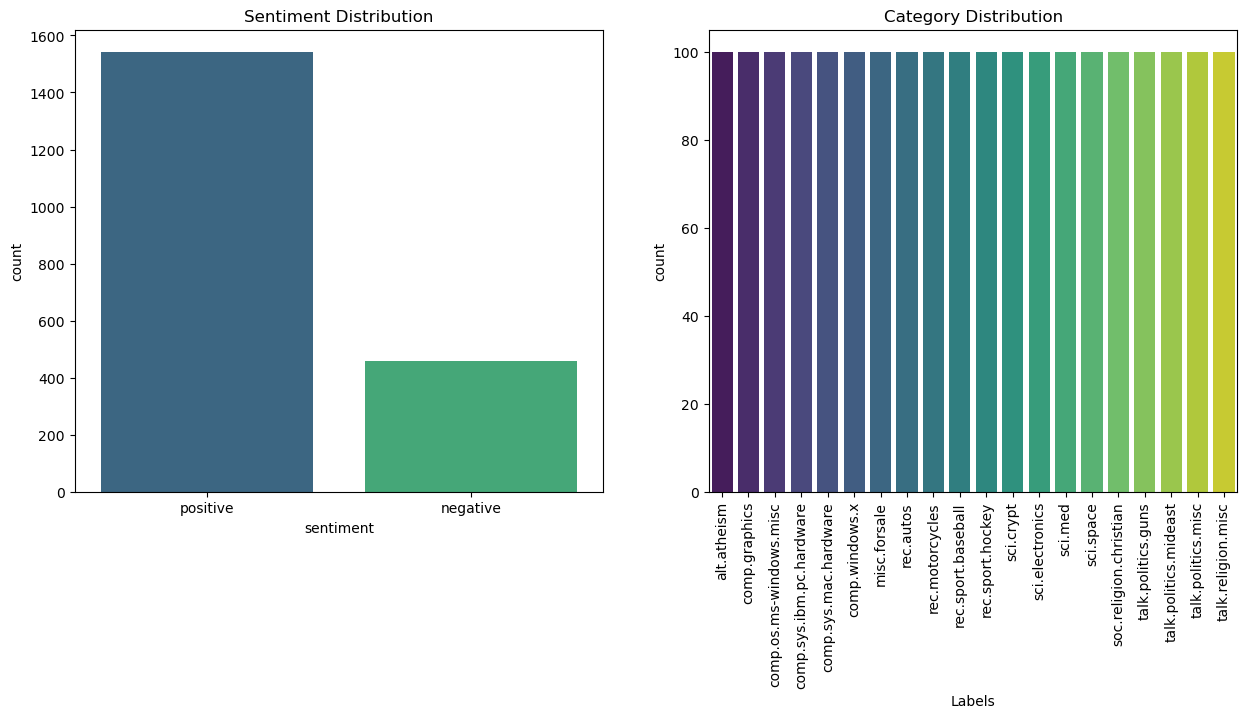

In [20]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
sns.countplot(x='sentiment', data=df, palette='viridis', ax=axs[0])
axs[0].set_title('Sentiment Distribution')
sns.countplot(x='Labels', data=df, palette='viridis', ax=axs[1])
axs[1].set_title('Category Distribution')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
plt.show()

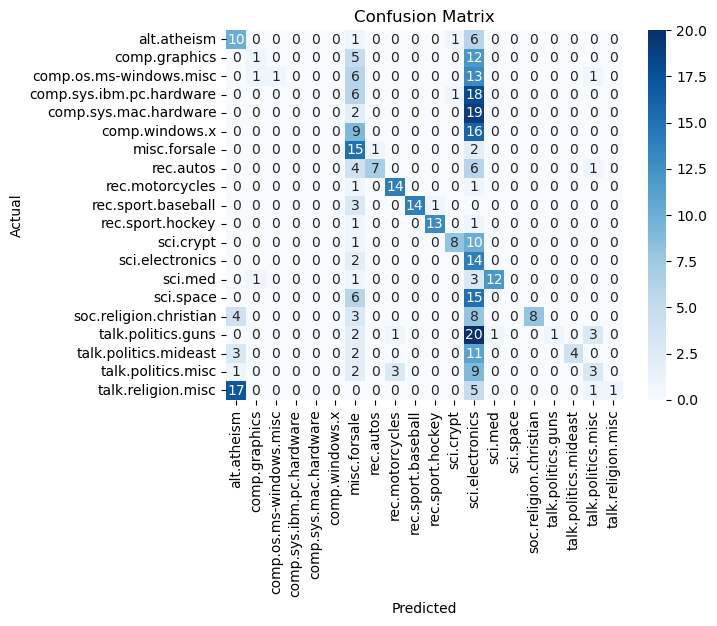

In [21]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Conclusion:


This approach is concise and efficient, reducing the overall code length by using inline processing and lambda functions. It achieves the same results with less code, but at the cost of readability and maintainability. This approach is suitable for quick implementations where simplicity and brevity are prioritized over modularity.